# Predicting Car Prices using K-nearest neighbors algorithm

This project focuses on showcasing the k-nearest neighbors algorithm. This is a simple machine learning algorithm that stores all available cases and classifies new cases based on a similarity measure.

The dataset we are working with is from the UCI Machine Learning Repository, containing information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

Our goal is to use this information in a k-nearest neighbor algorithm in order to predict a car's market price.

In [1]:
import pandas as pd
import numpy as np

#we can look at column names from the UCI Machine Learning Repository webpage
cols= ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)

In [2]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data cleaning

In [3]:
#Lets isolate the numeric columns only, since that is what we focus on in the project
numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_columns]

In [4]:
#Lets then get replace the '?' values with nan values
numeric_cars = numeric_cars.replace('?',np.nan)

In [5]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#We can see what NaN values we have left
numeric_cars = numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [22]:
# Our goal is price prediction, so we need to take care of the NaN values in the price column
numeric_cars = numeric_cars.dropna(subset=['price'])

# We then replace the remaining NaN values in the columns with the column mean
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [8]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# Now that we have eliminated null values, we can normalize the numeric columns.
# Note that we leave out normalization of the target column, price.

price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [10]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #We shuffle the ordering of the rows
    df_shuffled = np.random.permutation(df.index)
    rand_df = df.reindex(df_shuffled)
    
     # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3833.751813
curb-weight          4793.311495
city-mpg             4910.800497
width                5058.243189
horsepower           5395.258339
highway-mpg          5492.065844
length               5948.943911
wheel-base           6256.648461
compression-rate     7361.736794
normalized-losses    7970.597837
height               8104.289296
bore                 8140.659764
peak-rpm             8459.707259
stroke               8836.140378
dtype: float64

Looking at the columns and their corresponding RSME values, we can see that the column with the lowest RSME (error) value is the engine-size column. 

Remember that the above was done using the default k value. Below, we introduce a variety of k values and evaluate performance of the model.

# Modifying to incorporate the k parameter

In [12]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

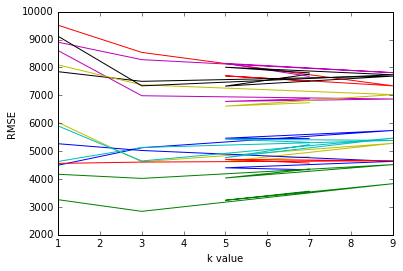

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for key,value in k_rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y)
    
    plt.xlabel('k value')
    plt.ylabel('RMSE')

The graph above shows the distribution of RSME values with the corresponding k value for each column in the numeric_cars dataframe. 

The purpose of this plot is to show how much k values affect RSME.

In [14]:
feature_avg_rmse = {}
for key,value in k_rmse_results.items():
    avg_rmse = np.mean(list(value.values()))
    feature_avg_rmse[key] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse = series_avg_rmse.sort_values()
print(series_avg_rmse)

best_performers = series_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


# Multivariate model

Let's now optimize the model that performed best in the previous step

So far we have tested the KNN model using a single column at a time. We did this with both the default k value and varying k values.

Now we look at including multiple columns in our model at a single time.

In [15]:
#Lets first modify the function to have multiple columns using the default k

def knn_train_test(train_cols,target_col,df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols],train_df[target_col])
        
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

# We iterate through the best_performing columns
k_rmse_results = {}
for num_best_features in range(2,7):
    k_rmse_results['{} best features'.format(num_best_features)] = knn_train_test(best_performers[:num_best_features],'price',numeric_cars)
    
k_rmse_results    

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

# Hyperparameter Optimization

Remember in the last step we kept k constant at the default value of 5.
Here, we take the best performing models from the last step and vary k from 1 to 25.

In [16]:
# We first write out the model function and then iterate through the best performers

def knn_train_test(train_cols,target_col,df):
    np.random.seed(1)
       
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1,26)]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols],train_df[target_col])
        
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}
for num_best_features in range(2,6):
    k_rmse_results['{} best features'.format(num_best_features)] = knn_train_test(best_performers[:num_best_features],'price',numeric_cars)
    
k_rmse_results    

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.21649

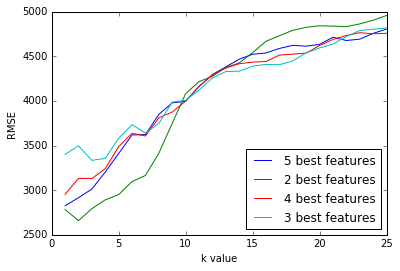

In [17]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='lower right')

In [18]:
# The last thing we need to do is find the optimal k for each model
best_two_feat_k = {}
best_three_feat_k = {}
best_four_feat_k = {}
best_five_feat_k = {}

for key,val in k_rmse_results.items():
    if key == '2 best features':
        best_two_feat_k[key] = val
    elif key == '3 best features':
        best_three_feat_k[key] = val
    elif key == '4 best features':
        best_four_feat_k[key] = val
    elif key == '5 best features':
        best_five_feat_k[key] = val

In [19]:
two = pd.DataFrame(best_two_feat_k)
three = pd.DataFrame(best_three_feat_k)
four = pd.DataFrame(best_four_feat_k)
five = pd.DataFrame(best_five_feat_k)

In [20]:
result = pd.concat([two, three,four,five], axis=1)
result.index.name = 'k_value'
result

,2 best features,3 best features,4 best features,5 best features
k_value,,,,
1,2783.620424,3399.814810,2952.725687,2824.706123
2,2657.796381,3497.191103,3131.704953,2915.673165
3,2792.586573,3333.696658,3129.692822,3012.420455
4,2891.532969,3355.884229,3241.432078,3202.887605
5,2949.881728,3580.737665,3487.340917,3410.217013
6,3096.402602,3732.943017,3637.038147,3618.450943
7,3164.681969,3639.943941,3606.195078,3622.629021
8,3413.228359,3747.420913,3809.930703,3848.635836
9,3748.671660,3986.593913,3875.274902,3977.814914


In [21]:
# We can now list the optimal k values for the varying number of best features
print('The lowest RMSE value when using the 2 best features is {}, corresponding to a k_value of {}'.format(result['2 best features'].min(),2))
print('The lowest RMSE value when using the 3 best features is {}, corresponding to a k_value of {}'.format(result['3 best features'].min(),3))
print('The lowest RMSE value when using the 4 best features is {}, corresponding to a k_value of {}'.format(result['4 best features'].min(),1))
print('The lowest RMSE value when using the 5 best features is {}, corresponding to a k_value of {}'.format(result['5 best features'].min(),1))

The lowest RMSE value when using the 2 best features is 2657.7963807419765, corresponding to a k_value of 2
The lowest RMSE value when using the 3 best features is 3333.6966577570593, corresponding to a k_value of 3
The lowest RMSE value when using the 4 best features is 2952.725686581471, corresponding to a k_value of 1
The lowest RMSE value when using the 5 best features is 2824.7061233282866, corresponding to a k_value of 1
